In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('spam.csv', encoding='latin-1')


In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4705,ham,Wow so healthy. Old airport rd lor. Cant thk o...,NaN,NaN,NaN
3069,ham,I'm now but have to wait till 2 for the bus to...,NaN,NaN,NaN
154,ham,"You are everywhere dirt, on the floor, the win...",NaN,NaN,NaN
1463,ham,Ok good then i later come find Ì_... C lucky i...,NaN,NaN,NaN
5347,ham,No sir. That's why i had an 8-hr trip on the b...,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
df.size


27860

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


# 1. Data Cleaning

In [16]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [9]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [10]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [16]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

C:\Users\hario\AppData\Local\Temp\ipykernel_18252\197907457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'v1':'target','v2':'text'},inplace=True)


In [17]:
df.sample(5)

,target,text
2199,ham,Not sure I have the stomach for it ...
2376,ham,I'm on my way home. Went to change batt 4 my w...
54,spam,SMS. ac Sptv: The New Jersey Devils and the De...
1407,ham,Then we gotta do it after that
1051,ham,Do u noe wat time e place dat sells 4d closes?


In [11]:
from sklearn.preprocessing import LabelEncoder 
encoder = LabelEncoder()

In [18]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
# check for duplicate values
df.duplicated().sum()

np.int64(403)

In [14]:
df = df.drop_duplicates(keep='first')

In [15]:
df.sample(3)

,v1,v2
1709,ham,U meet other fren dun wan meet me ah... Muz b ...
3471,ham,I think IÛ÷m waiting for the same bus! Inform...
3552,ham,Din i tell u jus now 420


In [12]:
# final dataset format
df.shape

(5169, 2)

# 2. EDA (Exploratory Data Analysis)

In [13]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df['target'].value_counts()

target
ham     4516
spam     653
Name: count, dtype: int64

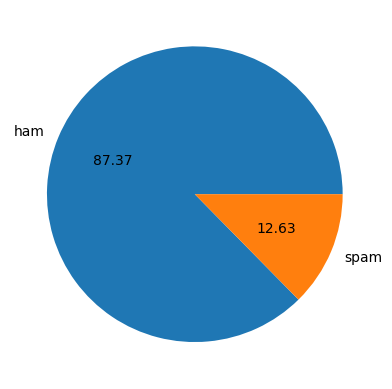

In [22]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [23]:
# Data is unbalanced

In [24]:
import nltk

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hario\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [27]:
df['text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5169, dtype: object